C:\Users\blien\AppData\Local\Temp\ipykernel_21572\960656782.py:63: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged['sentiment'].fillna(0, inplace=True)


Pearson correlation between daily sentiment and stock returns: -0.0123


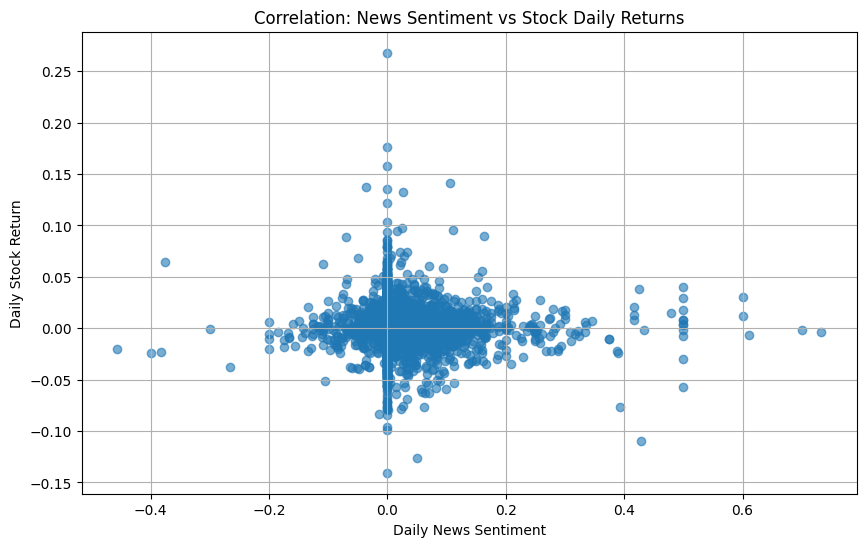

,Date,Close,daily_return,sentiment
0,2009-01-02,2.718,NaN,0.0
1,2009-01-05,2.703,-0.005519,0.0
2,2009-01-06,2.868,0.061043,0.0
3,2009-01-07,2.810,-0.020223,0.0
4,2009-01-08,2.858,0.017082,0.0


In [ ]:

import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt


df_news = pd.read_csv('../data/raw_analyst_ratings.csv')  # adjust path if needed
df_stock = pd.read_csv('../data/AMZN.csv', parse_dates=['Date'])
df_stock.set_index('Date', inplace=True)

# Strip whitespace from column names
df_news.columns = df_news.columns.str.strip()


df_news['date'] = pd.to_datetime(df_news['date'], errors='coerce')
df_news.dropna(subset=['date'], inplace=True)
df_news['date'] = df_news['date'].dt.date  
df_stock['Date'] = df_stock.index.date


def get_sentiment(text):
    """Return polarity score (-1 to 1) using TextBlob"""
    return TextBlob(str(text)).sentiment.polarity

df_news['sentiment'] = df_news['headline'].apply(get_sentiment)


daily_sentiment = df_news.groupby('date')['sentiment'].mean().reset_index()


df_stock['daily_return'] = df_stock['Close'].pct_change()
df_stock.reset_index(drop=True, inplace=True)



df_merged = pd.merge(
    df_stock,
    daily_sentiment,
    left_on='Date',
    right_on='date',
    how='left'
)


df_merged['sentiment'].fillna(0, inplace=True)



correlation = df_merged['daily_return'].corr(df_merged['sentiment'])
print(f"Pearson correlation between daily sentiment and stock returns: {correlation:.4f}")



plt.figure(figsize=(10,6))
plt.scatter(df_merged['sentiment'], df_merged['daily_return'], alpha=0.6)
plt.xlabel("Daily News Sentiment")
plt.ylabel("Daily Stock Return")
plt.title("Correlation: News Sentiment vs Stock Daily Returns")
plt.grid(True)
plt.show()


df_merged[['Date', 'Close', 'daily_return', 'sentiment']].head()
